# Batch correction in Bulk RNA-seq or microarray data

Colab_Reproducibility:https://colab.research.google.com/drive/121bbIiI3j4pTZ3yA_5p8BRkRyGMMmNAq?usp=sharing

Microarray数据是指在分子生物学中使用的一种高通量技术，可以同时测量数千个基因的表达水平。它涉及到一个小的固定支持物，如玻璃片或硅芯片，上面固定了DNA或RNA探针。这些探针与样本中的特定目标序列结合，使研究人员能够测量特定基因或基因变体的丰度。Microarray数据提供了有关基因表达模式的宝贵信息，可以用于研究各种生物过程和疾病。


[pyCombat](https://doi.org/10.1101/2020.03.17.995431)是用于纠正bulk RNA-seq数据中的误差(variability)的方法[ComBat]()的python实现。


In [2]:
import anndata
import pandas as pd
import omicverse as ov

ov.ov_plot_set()

## 1 Loading dataset

In [3]:
"""
There are three dataset about ovarian(卵巢) cancer data.
- '.pickle'是Python中的一种文件格式，用于序列化（将对象转换为字节流）和反序列化（将字节流转换回对象）Python对象。pickle文件可以存储包括数据结构、变量、字典等在内的Python对象。它是一种二进制文件格式，可以跨不同的Python版本和操作系统进行读写。
- pickle文件通常用于在程序运行期间保存和恢复数据，或者用于在不同程序之间传递数据。
"""

dataset_1=pd.read_pickle('./data/GSE18520.pickle')
dataset_1

,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,GSM461357,...,GSM462643,GSM462644,GSM462645,GSM462646,GSM462647,GSM462648,GSM462649,GSM462650,GSM462651,GSM462652
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.140080,4.589471,4.526200,4.326366,4.141506,4.528423,4.419378,4.345215,4.184150,4.393646,...,4.126494,4.574471,4.240500,4.114945,4.713432,4.739403,4.712107,4.808004,4.703300,4.306478
A1BG-AS1,5.747136,6.130257,5.781449,5.914044,6.277715,5.668244,5.879830,6.013980,5.968187,6.017624,...,6.137646,5.745849,5.780736,5.730519,6.373822,6.658268,5.879830,5.933032,5.687564,6.079262
A1CF,5.026368,5.120523,5.220462,4.828303,5.078094,5.204209,4.865023,5.119231,5.219517,4.706890,...,5.140163,5.021489,5.162582,5.331422,4.436061,4.564726,4.366117,4.381249,4.297101,4.355982
A2M,7.892506,7.730116,7.796338,8.525168,7.545032,7.846979,7.638513,7.487679,7.533089,6.965395,...,8.430961,7.573045,7.309055,7.346444,8.249467,7.659876,7.913722,7.427419,8.196998,8.037912
A2M-AS1,5.264009,4.685076,5.087545,5.309136,4.945470,5.178377,4.999350,5.372878,5.688810,4.882839,...,5.478883,5.612680,5.089749,4.864790,5.633757,6.537758,6.081657,5.413729,5.796207,5.900498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYG11A,5.004921,5.445204,5.857117,5.526792,5.164317,5.048579,5.255179,4.933072,5.092032,5.135326,...,5.031164,4.577465,5.118676,4.722024,4.177683,3.643435,4.411884,4.012999,4.103803,4.670390
ZYG11B,7.176005,6.510578,6.424211,6.589985,6.425785,6.370724,7.162010,6.885760,6.560944,7.346076,...,6.952578,7.294935,6.611723,6.881223,8.156498,8.654275,8.705879,8.310356,8.504587,8.440717
ZYX,7.225408,6.779436,7.319842,7.752277,7.358358,7.174173,7.234553,7.535016,8.307207,6.843535,...,7.337551,7.245617,7.157676,7.391466,8.243774,7.892368,8.210602,8.032438,8.331878,7.894440


In [4]:
adata1=anndata.AnnData(dataset_1.T)
adata1.obs['batch']='1'
adata1

AnnData object with n_obs × n_vars = 63 × 21755
    obs: 'batch'

In [7]:
dataset_2 = pd.read_pickle("./data/GSE66957.pickle")
adata2=anndata.AnnData(dataset_2.T)
adata2.obs['batch']='2'
adata2

AnnData object with n_obs × n_vars = 69 × 22115
    obs: 'batch'

In [9]:
dataset_3 = pd.read_pickle("./data/GSE69428.pickle")
adata3=anndata.AnnData(dataset_3.T)
adata3.obs['batch']='3'
adata3

AnnData object with n_obs × n_vars = 29 × 21755
    obs: 'batch'

In [10]:
"""
将所有细胞拼接在一起，并取所包含基因的交集
"""

adata=anndata.concat([adata1,adata2,adata3],merge='same')
adata

AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'

## 2 Removing batch effect

In [12]:
ov.bulk.batch_correction(adata,batch_key='batch')

Found 3 batches.
Adjusting for 0 covariate(s) or covariate level(s).
Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data
Storing batch correction result in adata.layers['batch_correction']


In [13]:
adata

AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'
    layers: 'batch_correction'

## 3 Saving results

In [14]:
"""
Raw datasets
"""
raw_data=adata.to_df().T
raw_data.head()

,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,GSM461357,...,GSM1701044,GSM1701045,GSM1701046,GSM1701047,GSM1701048,GSM1701049,GSM1701050,GSM1701051,GSM1701052,GSM1701053
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.140080,4.589471,4.526200,4.326366,4.141506,4.528423,4.419378,4.345215,4.184150,4.393646,...,3.490229,4.542913,4.654638,4.199212,4.080964,4.114272,3.883770,4.103220,3.883770,3.487520
A1BG-AS1,5.747136,6.130257,5.781449,5.914044,6.277715,5.668244,5.879830,6.013980,5.968187,6.017624,...,4.005230,4.301880,4.509698,4.089223,4.129561,3.867567,4.094032,3.616044,4.307225,3.891060
A1CF,5.026368,5.120523,5.220462,4.828303,5.078094,5.204209,4.865023,5.119231,5.219517,4.706890,...,4.225589,3.530307,3.215182,2.967514,3.012953,3.496765,3.117001,3.072093,2.570765,3.163533
A2M,7.892506,7.730116,7.796338,8.525168,7.545032,7.846979,7.638513,7.487679,7.533089,6.965395,...,10.273206,4.061911,4.393332,4.716536,3.447348,3.134037,4.009413,3.953612,7.664853,3.548574
A2ML1,3.966217,4.482255,3.964664,3.906967,3.952820,3.985276,3.997008,4.101457,4.015285,3.765736,...,2.478731,4.132282,3.952693,2.527621,2.358378,2.414869,2.204600,2.295500,2.167646,2.216867


In [15]:
"""
Removing Batch datasets
"""

removing_data=adata.to_df(layer='batch_correction').T
removing_data.head()

,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,GSM461357,...,GSM1701044,GSM1701045,GSM1701046,GSM1701047,GSM1701048,GSM1701049,GSM1701050,GSM1701051,GSM1701052,GSM1701053
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,4.223549,4.846659,4.758930,4.481847,4.225527,4.762012,4.610814,4.507982,4.284655,4.575135,...,4.237836,5.378695,5.499778,5.006205,4.878052,4.914150,4.664341,4.902173,4.664341,4.234900
A1BG-AS1,5.730287,6.253722,5.777166,5.958322,6.455185,5.622500,5.911578,6.094859,6.032295,6.099838,...,5.841898,5.990944,6.095359,5.884098,5.904365,5.772731,5.886515,5.646358,5.993630,5.784535
A1CF,3.922941,3.975597,4.031489,3.812171,3.951869,4.022399,3.832708,3.974874,4.030960,3.744271,...,4.229096,3.822095,3.637628,3.492649,3.519248,3.802460,3.580155,3.553867,3.260401,3.607394
A2M,9.488789,9.219466,9.329295,10.538060,8.912504,9.413282,9.067542,8.817383,8.892696,7.951175,...,11.137032,7.182184,7.393206,7.598996,6.790880,6.591389,7.148757,7.113228,9.476245,6.855333
A2ML1,4.317770,5.553678,4.314051,4.175866,4.285686,4.363418,4.391514,4.641670,4.435287,3.837621,...,3.807064,5.766146,5.553374,3.864987,3.664473,3.731402,3.482281,3.589976,3.438499,3.496814


In [16]:
"""
save
"""
raw_data.to_csv('./data/raw_data.csv')
removing_data.to_csv('./data/removing_data.csv')
adata.write_h5ad('./data/adata_batch.h5ad',compression='gzip')  # save adata object

## 4 Compare the dataset before and after correction

In [17]:
"""
use boxplots to observe the effect of batch removal

assign three different colors to three datasets
"""
color_dict={
    '1':ov.utils.red_color[1],
    '2':ov.utils.blue_color[1],
    '3':ov.utils.green_color[1],
}

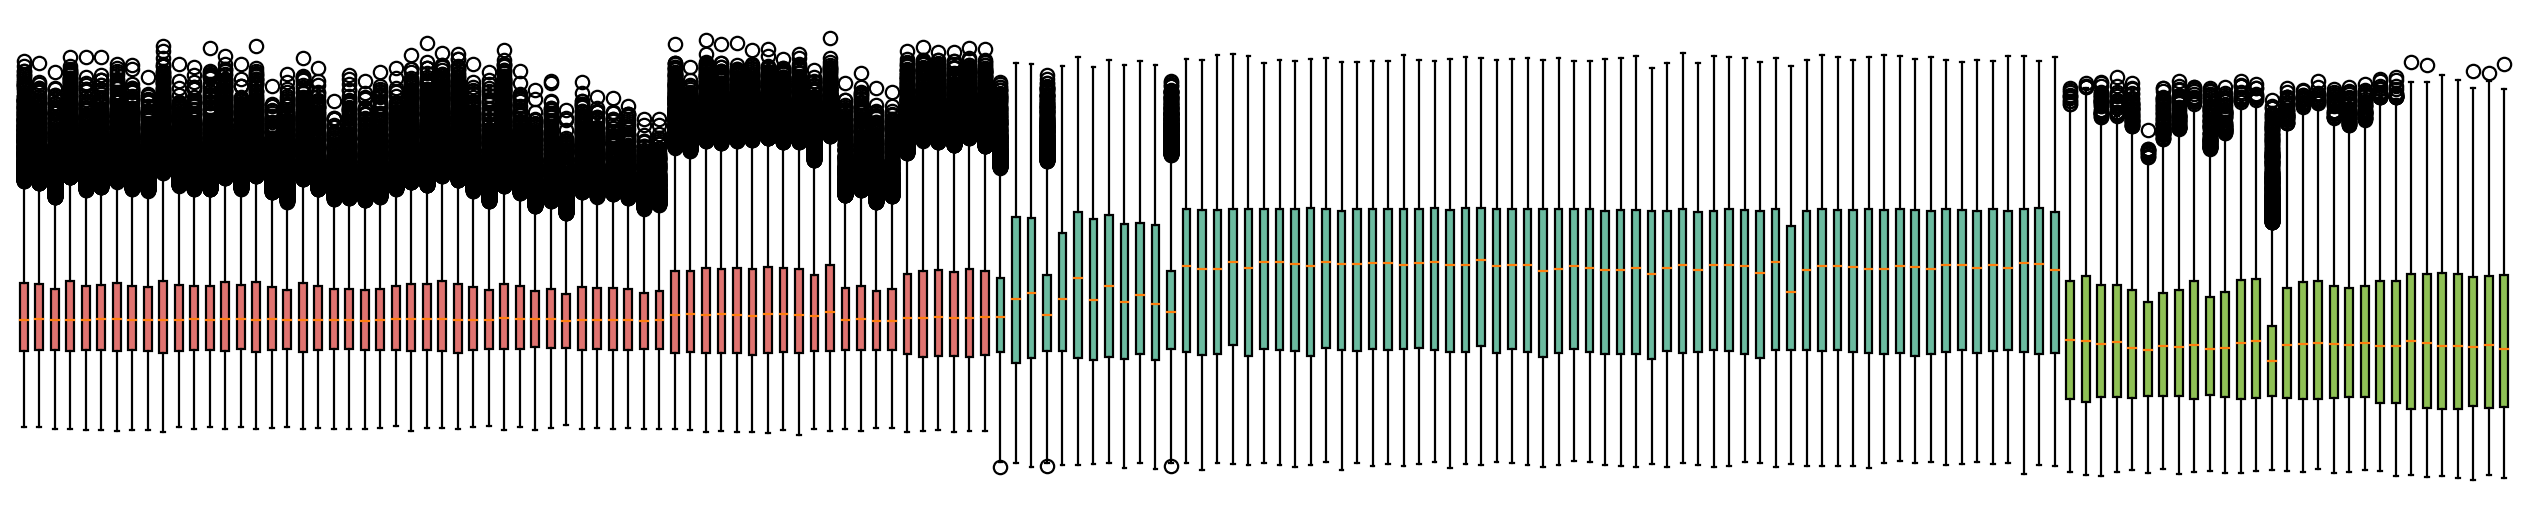

In [21]:
from matplotlib import pyplot as plt

"""
生成一个箱线图，用于可视化adata数据集中每个样本的批次信息，并使用不同颜色区分不同批次的样本
"""
fig,ax=plt.subplots( figsize = (20,4))

# 使用adata数据集中的转置数据创建一个箱线图，并将patch_artist参数设置为True，以便对箱体进行填充色彩。
bp=plt.boxplot(adata.to_df().T,patch_artist=True)

# range(adata.shape[0])用于循环遍历adata数据集的每个样本
# adata.obs['batch']包含了每个样本对应的批次信息。
for i,batch in zip(range(adata.shape[0]),adata.obs['batch']):
    # 根据每个样本的批次信息，在箱线图中设置对应样本的箱体颜色。
    bp['boxes'][i].set_facecolor(color_dict[batch])


ax.axis(False)  # 将坐标轴的显示设置为False，即隐藏坐标轴。
plt.show()

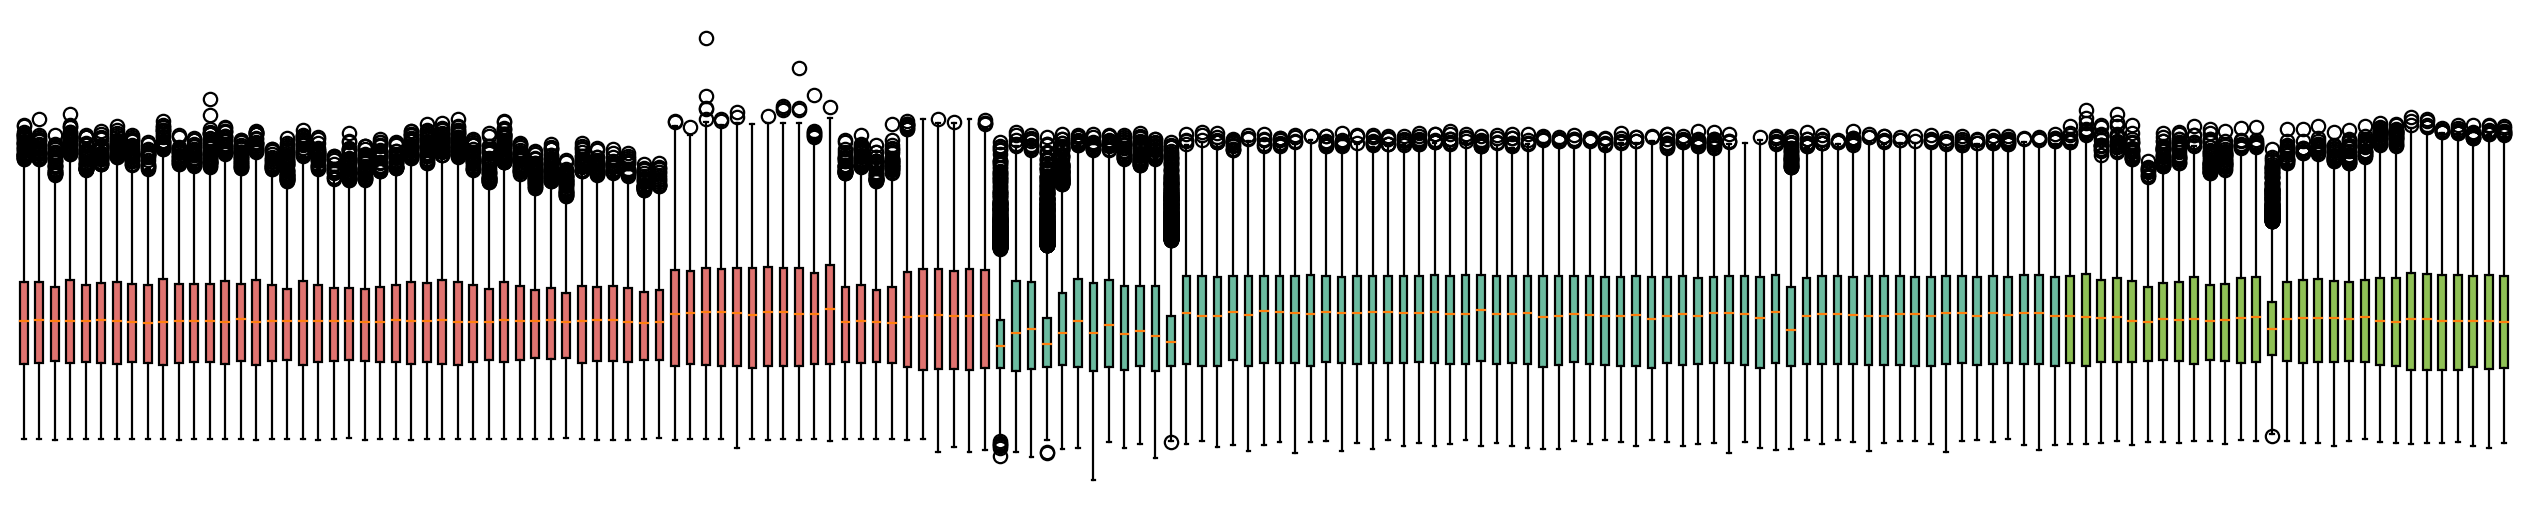

In [22]:
fig,ax=plt.subplots( figsize = (20,4))
bp=plt.boxplot(adata.to_df(layer='batch_correction').T,patch_artist=True)
for i,batch in zip(range(adata.shape[0]),adata.obs['batch']):
    bp['boxes'][i].set_facecolor(color_dict[batch])
ax.axis(False)
plt.show()

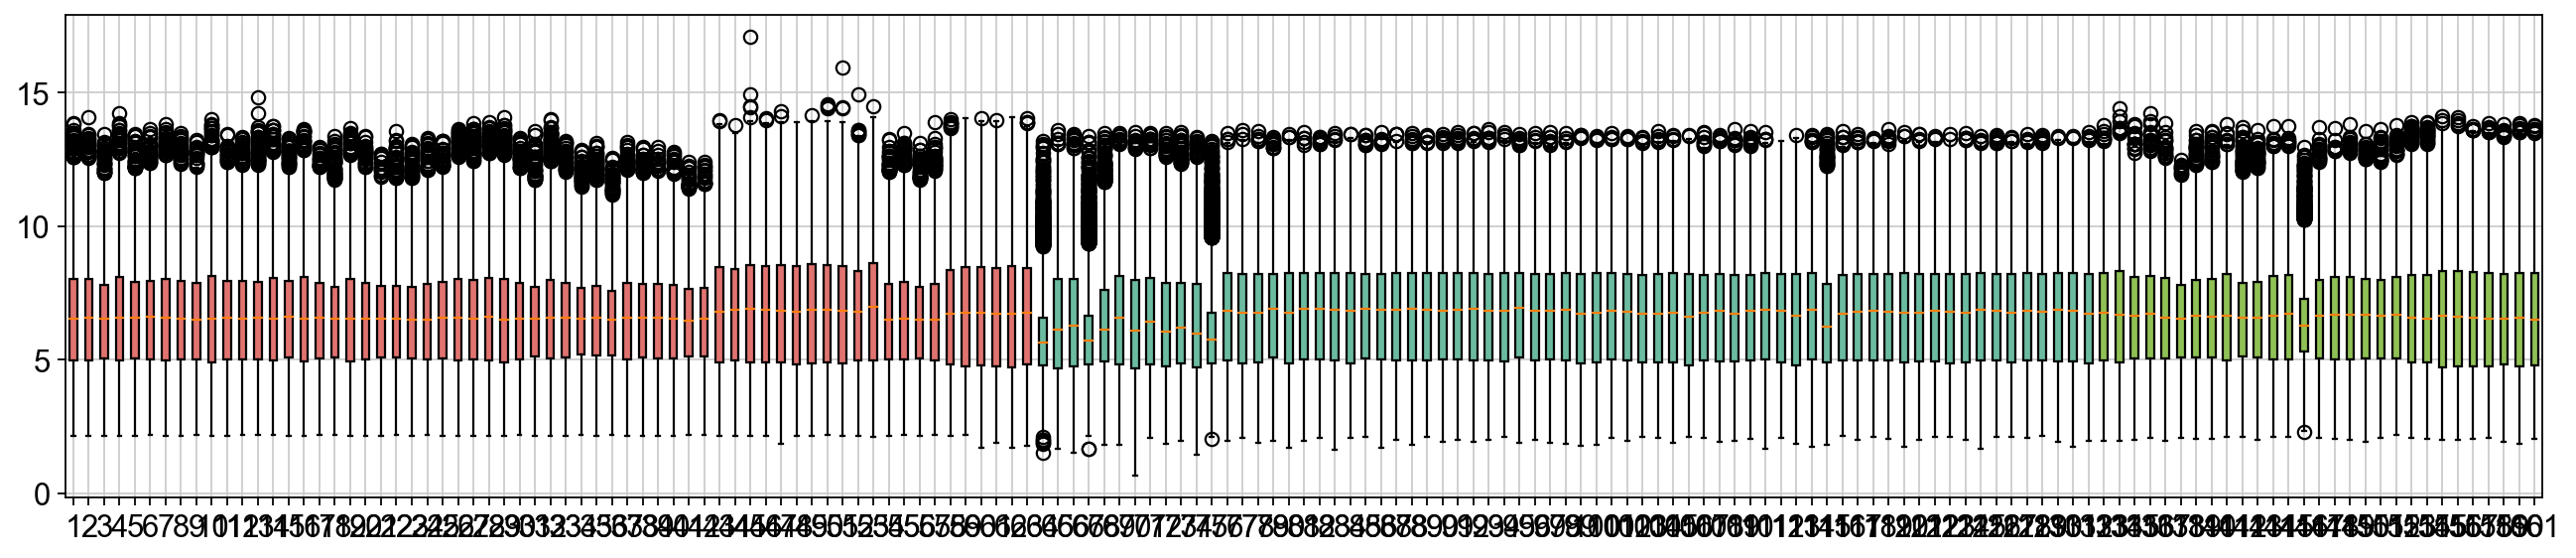

In [20]:
"""
test
"""
fig,ax=plt.subplots( figsize = (20,4))
bp=plt.boxplot(adata.to_df(layer='batch_correction').T,patch_artist=True)
for i,batch in zip(range(adata.shape[0]),adata.obs['batch']):
    bp['boxes'][i].set_facecolor(color_dict[batch])
ax.axis(True)
plt.show()

In [23]:
"""
use PCA to observe the effect of batch removal
"""

adata.layers['raw']=adata.X.copy()

In [24]:
#  calculate the PCA on the raw dataset
ov.pp.pca(adata,layer='raw',n_pcs=50)
adata

AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'
    uns: 'raw|original|pca_var_ratios', 'raw|original|cum_sum_eigenvalues'
    obsm: 'raw|original|X_pca'
    varm: 'raw|original|pca_loadings'
    layers: 'batch_correction', 'raw', 'lognorm'

In [25]:
# calculate the PCA on the batch_correction dataset
ov.pp.pca(adata,layer='batch_correction',n_pcs=50)
adata

AnnData object with n_obs × n_vars = 161 × 17126
    obs: 'batch'
    uns: 'raw|original|pca_var_ratios', 'raw|original|cum_sum_eigenvalues', 'batch_correction|original|pca_var_ratios', 'batch_correction|original|cum_sum_eigenvalues'
    obsm: 'raw|original|X_pca', 'batch_correction|original|X_pca'
    varm: 'raw|original|pca_loadings', 'batch_correction|original|pca_loadings'
    layers: 'batch_correction', 'raw', 'lognorm'

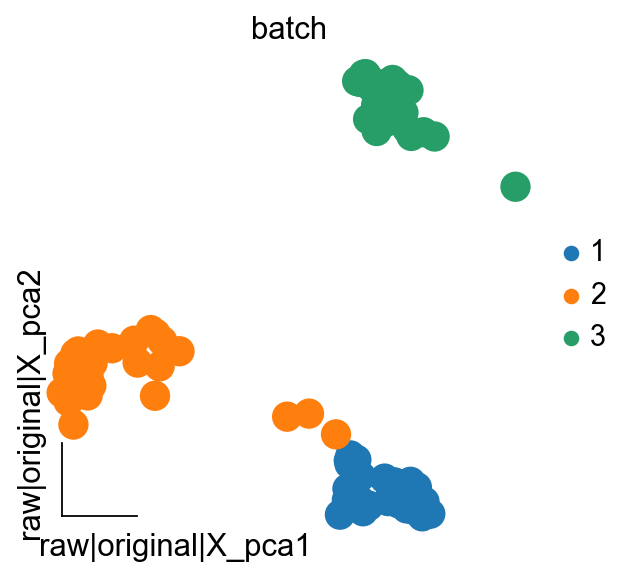

In [26]:
ov.utils.embedding(adata,
                  basis='raw|original|X_pca',
                  color='batch',
                  frameon='small')

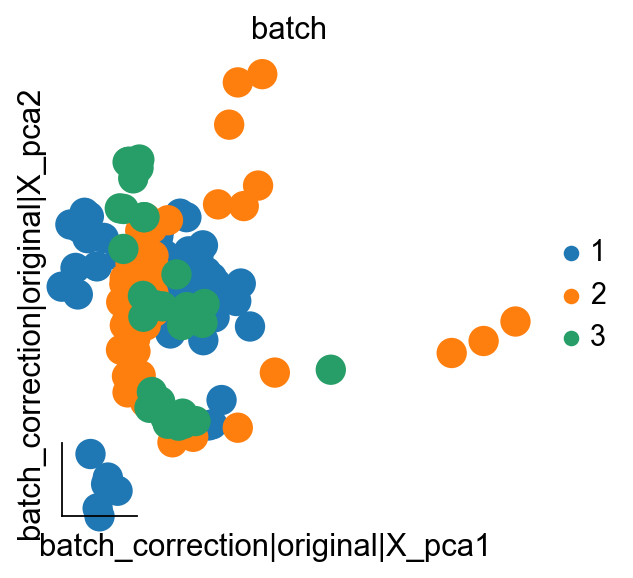

In [27]:
ov.utils.embedding(adata,
                  basis='batch_correction|original|X_pca',
                  color='batch',
                  frameon='small')

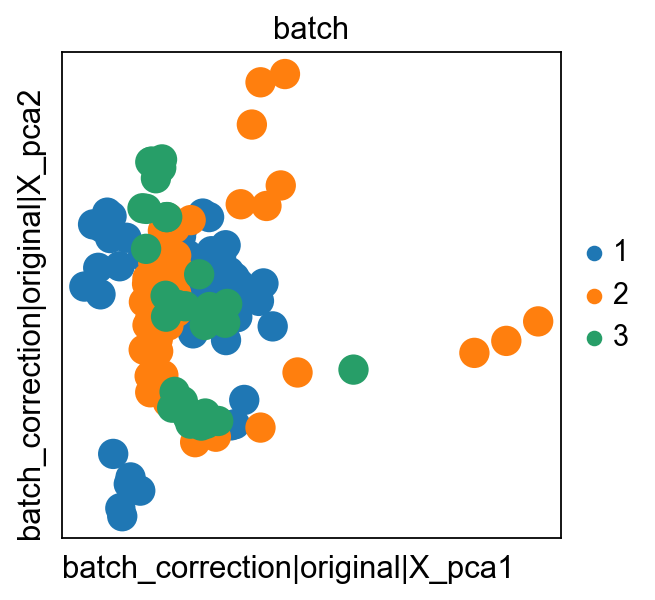

In [28]:
ov.utils.embedding(adata,
                  basis='batch_correction|original|X_pca',
                  color='batch')